Saving sales-of-shampoo-over-a-three-ye (1).csv to sales-of-shampoo-over-a-three-ye (1) (1).csv


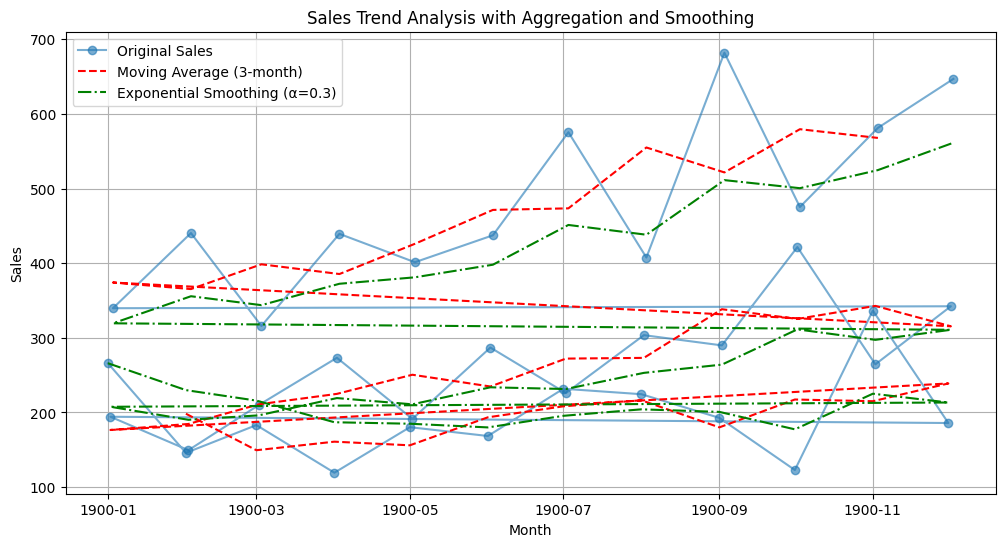

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (Make sure to upload the file in Colab)
from google.colab import files
uploaded = files.upload()

# Read the CSV file (update the filename accordingly)
df = pd.read_csv("/content/car_sales.csv")

# Rename columns for easier access
df.columns = ["Month", "Sales"]

# Convert Month column to datetime format (assuming no year is provided, setting a default year)
df["Month"] = pd.to_datetime(df["Month"], format="%d-%b", errors="coerce")

# Moving Average (Aggregation) - Rolling Mean with a window of 3 months
df["Moving_Avg"] = df["Sales"].rolling(window=3, center=True).mean()

# Exponential Smoothing (Smoothing)
alpha = 0.3  # Smoothing factor
df["Exp_Smooth"] = df["Sales"].ewm(alpha=alpha, adjust=False).mean()

# Plot the original data and the smoothed versions
plt.figure(figsize=(12, 6))
plt.plot(df["Month"], df["Sales"], label="Original Sales", marker='o', linestyle='-', alpha=0.6)
plt.plot(df["Month"], df["Moving_Avg"], label="Moving Average (3-month)", linestyle='--', color='red')
plt.plot(df["Month"], df["Exp_Smooth"], label="Exponential Smoothing (α=0.3)", linestyle='-.', color='green')

# Labels and Title
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Sales Trend Analysis with Aggregation and Smoothing")
plt.legend()
plt.grid(True)
plt.show()
